集成於 yfinance，使用相同資料

In [ ]:
pip install ffn

要捉 SPY 2021年以後的資料

In [2]:
import ffn
# ffn 取得 股價
prices = ffn.get('spy', start='2021-01-01')
prices[0: 10]

/Users/samhsiao/Documents/PythonVenv/envDash/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


[*********************100%%**********************]  1 of 1 completed


,spy
Date,
2021-01-04,354.197418
2021-01-05,356.636841
2021-01-06,358.769073
2021-01-07,364.099487
2021-01-08,366.173981
2021-01-11,363.705688
2021-01-12,363.782501
2021-01-13,364.762146
2021-01-14,363.484711


若出現錯誤訊息 TypeError: string indices must be integers

In [7]:
import yfinance
yfinance.pdr_override()

rebase ⇒ 將初始價格改為 100，可以比較兩個以上的股價漲跌變化

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

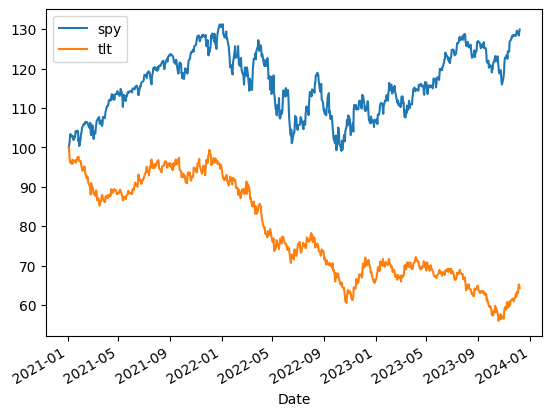

In [3]:
prices = ffn.get('spy, tlt', start='2021-01-01')
# rebase 股價繪圖
%matplotlib inline
prices.rebase().plot()

to_drawdown_series ⇒ 看最大的虧損

/Users/samhsiao/Documents/PythonVenv/envDash/lib/python3.9/site-packages/ffn/core.py:1232: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  drawdown = drawdown.fillna(method="ffill")


<Axes: xlabel='Date'>

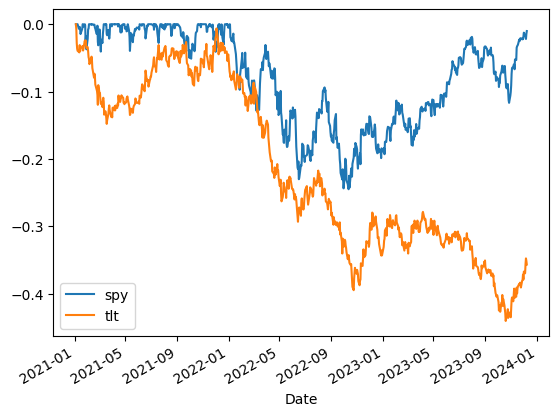

In [4]:
# Max Drawdown 最大虧損
prices.to_drawdown_series().plot()

calc_stats ⇒ 統計報表

In [8]:
# 統計報表
stats = prices.calc_stats()
stats.display()

Stat                 spy         tlt
-------------------  ----------  ----------
Start                2021-01-04  2021-01-04
End                  2023-12-08  2023-12-08
Risk-free rate       0.00%       0.00%

Total Return         29.93%      -35.67%
Daily Sharpe         0.59        -0.76
Daily Sortino        0.98        -1.30
CAGR                 9.37%       -14.00%
Max Drawdown         -24.50%     -44.05%
Calmar Ratio         0.38        -0.32

MTD                  0.83%       3.58%
3m                   3.66%       1.16%
6m                   8.02%       -5.67%
YTD                  21.67%      -2.06%
1Y                   17.97%      -10.46%
3Y (ann.)            9.37%       -14.00%
5Y (ann.)            -           -
10Y (ann.)           -           -
Since Incep. (ann.)  9.37%       -14.00%

Daily Sharpe         0.59        -0.76
Daily Sortino        0.98        -1.30
Daily Mean (ann.)    10.51%      -13.49%
Daily Vol (ann.)     17.71%      17.75%
Daily Skew           -0.14       0.15
D

/Users/samhsiao/Documents/PythonVenv/envDash/lib/python3.9/site-packages/ffn/core.py:1258: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return daily_prices[-1] / monthly_prices[-2] - 1
/Users/samhsiao/Documents/PythonVenv/envDash/lib/python3.9/site-packages/ffn/core.py:1270: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return daily_prices[-1] / yearly_prices[-2] - 1
/Users/samhsiao/Documents/PythonVenv/envDash/lib/python3.9/site-packages/ffn/core.py:232: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with Dat

display_monthly_returns ⇒ 月報酬

In [6]:
print(stats['spy'].display_monthly_returns())

  Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec     YTD
------  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  ------
  2021   0.35   2.78   4.54   5.29   0.66   2.24   2.44   2.98  -4.66   7.02  -0.8    4.62   30.51
  2022  -5.27  -2.95   3.76  -8.78   0.23  -8.25   9.21  -4.08  -9.24   8.13   5.56  -5.76  -18.18
  2023   6.29  -2.51   3.71   1.6    0.46   6.48   3.27  -1.63  -4.74  -2.17   9.13   0.83   21.67
None
